In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
%matplotlib inline


In [2]:
laptop_price_url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"

In [3]:
urlretrieve(laptop_price_url,'laptopprice.csv')

('laptopprice.csv', <http.client.HTTPMessage at 0x208c4682090>)

In [4]:
df=pd.read_csv("laptopprice.csv")

In [5]:
df.head()

,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6.1,978
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


In [6]:
headers=['Manufacturer','Category','Screen','GPU','OS','Cpu_core','Screen_Size_inch','Cpu_frequency','RAM_GB','Stroage_GB_SSD','Weight_kg','Price']

In [7]:
df.columns=headers

In [8]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_inch,Cpu_frequency,RAM_GB,Stroage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
df.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
Cpu_core              int64
Screen_Size_inch     object
Cpu_frequency       float64
RAM_GB                int64
Stroage_GB_SSD        int64
Weight_kg            object
Price                 int64
dtype: object

In [11]:
df.describe(include='all')

,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_inch,Cpu_frequency,RAM_GB,Stroage_GB_SSD,Weight_kg,Price
count,237,237.000000,237,237.000000,237.000000,237.000000,233,237.000000,237.000000,237.000000,232,237.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.202532,NaN,2.151899,1.059072,5.632911,NaN,2.363291,7.881857,245.738397,NaN,1464.388186
std,NaN,0.776450,NaN,0.639556,0.236258,1.243736,NaN,0.409271,2.487845,34.832516,NaN,574.956374
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1068.000000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      237 non-null    object 
 1   Category          237 non-null    int64  
 2   Screen            237 non-null    object 
 3   GPU               237 non-null    int64  
 4   OS                237 non-null    int64  
 5   Cpu_core          237 non-null    int64  
 6   Screen_Size_inch  233 non-null    object 
 7   Cpu_frequency     237 non-null    float64
 8   RAM_GB            237 non-null    int64  
 9   Stroage_GB_SSD    237 non-null    int64  
 10  Weight_kg         232 non-null    object 
 11  Price             237 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.3+ KB


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# df[['Screen_Sice_inch']]=np.round(df[['Screen_Size_cm']],2)
df.head()

,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_inch,Cpu_frequency,RAM_GB,Stroage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


In [15]:
df.isnull().sum()

Manufacturer        0
Category            0
Screen              0
GPU                 0
OS                  0
Cpu_core            0
Screen_Size_inch    4
Cpu_frequency       0
RAM_GB              0
Stroage_GB_SSD      0
Weight_kg           5
Price               0
dtype: int64

In [16]:
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df['Weight_kg'].replace(np.nan,avg_weight,inplace=True)

## exploratory data analysis

(0.0, 3974.15)

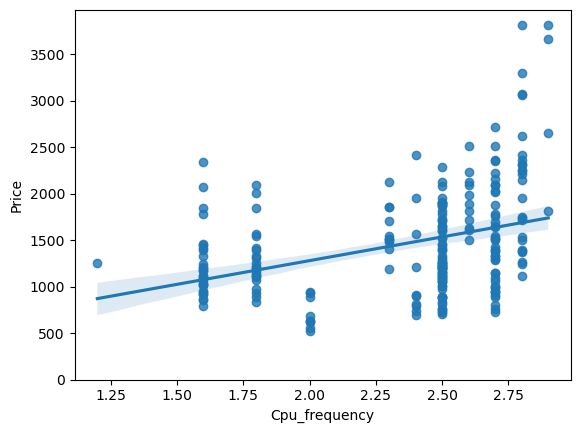

In [17]:
sns.regplot(x="Cpu_frequency", y="Price",data=df)
plt.ylim(0,)

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'Cpu_core',
       'Screen_Size_inch', 'Cpu_frequency', 'RAM_GB', 'Stroage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')
object
int64
float64
int64


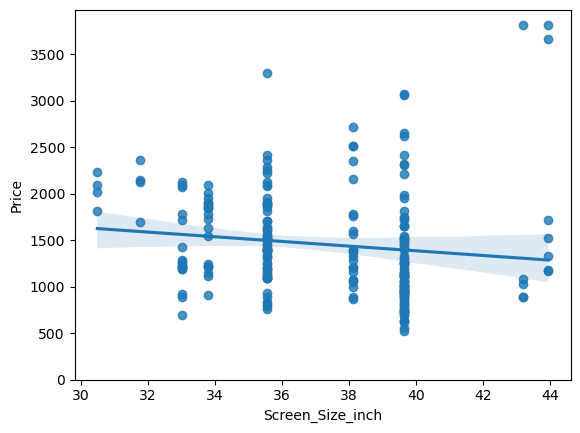

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if the columns exist
print(df.columns)

# Check for non-numeric values in the columns
print(df["Screen_Size_inch"].dtype)
print(df["Price"].dtype)

# Convert columns to numeric, coercing errors
df["Screen_Size_inch"] = pd.to_numeric(df["Screen_Size_inch"], errors='coerce')
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

# Drop rows with NaN values in the specified columns
df_cleaned = df.dropna(subset=["Screen_Size_inch", "Price"])

# Check the cleaned DataFrame
print(df_cleaned["Screen_Size_inch"].dtype)
print(df_cleaned["Price"].dtype)

# Plot the data
sns.regplot(x="Screen_Size_inch", y="Price", data=df_cleaned)

# Set the y-axis limit
plt.ylim(0, None)

# Show the plot
plt.show()


(0.0, 3974.15)

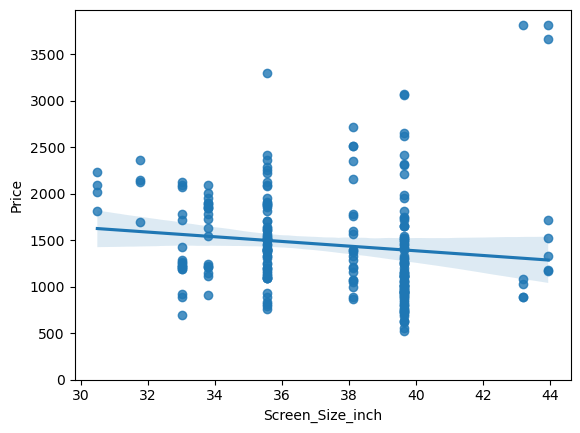

In [21]:
sns.regplot(x="Screen_Size_inch",y="Price",data=df)
plt.ylim(0,)

(0.0, 3974.15)

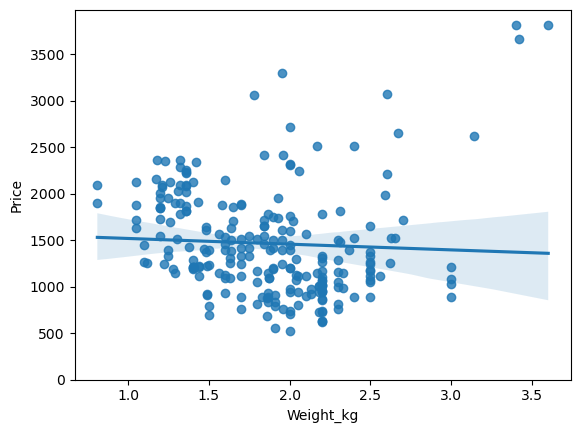

In [22]:
df['Weight_kg']=pd.to_numeric(df['Weight_kg'],errors='coerce')

sns.regplot(x = "Weight_kg",y = "Price",data = df)
plt.ylim(0,)

In [23]:
for param in ['Cpu_frequency','Screen_Size_inch','Weight_kg']:
    print(f"Correleration of price and {param} is ",df[[param,"Price"]].corr())

Correleration of price and Cpu_frequency is                 Cpu_frequency     Price
Cpu_frequency       1.000000  0.363247
Price               0.363247  1.000000
Correleration of price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.130568
Price                    -0.130568  1.000000
Correleration of price and Weight_kg is             Weight_kg     Price
Weight_kg   1.000000 -0.052368
Price      -0.052368  1.000000


<Axes: xlabel='Category', ylabel='Price'>

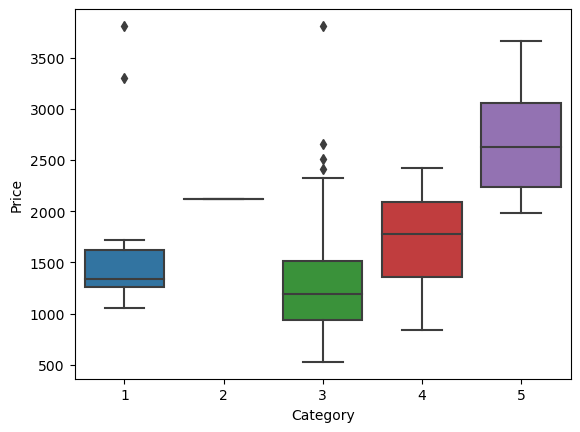

In [24]:
sns.boxplot(x="Category",y="Price",data=df)

<Axes: xlabel='GPU', ylabel='Price'>

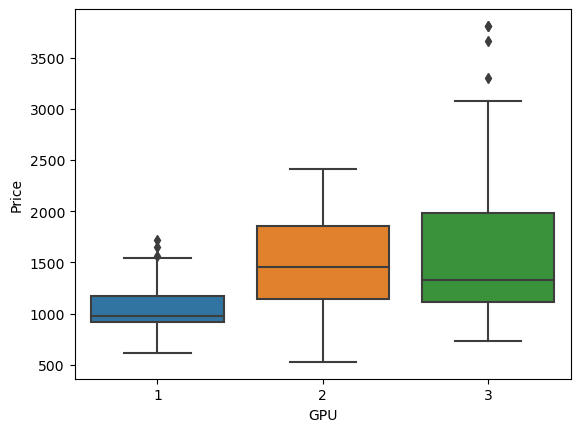

In [25]:
sns.boxplot(x="GPU",y="Price",data=df)

<Axes: xlabel='OS', ylabel='Price'>

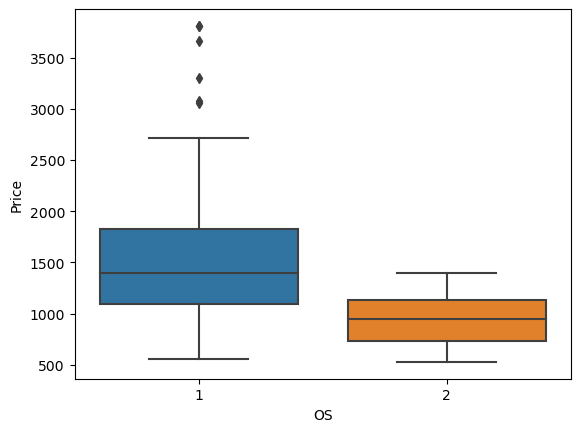

In [26]:
sns.boxplot(x="OS",y="Price",data=df)

In [27]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_inch,Cpu_frequency,RAM_GB,Stroage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016


<Axes: xlabel='Cpu_core', ylabel='Price'>

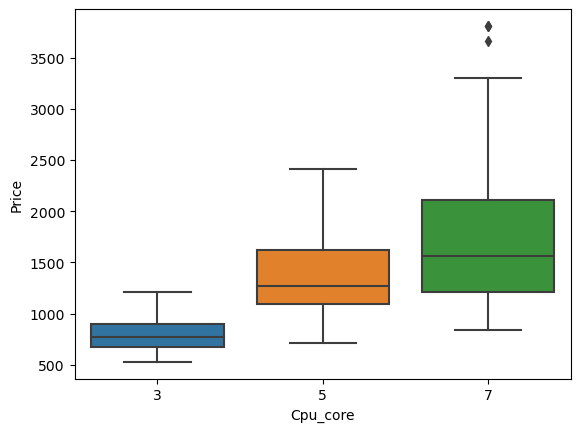

In [28]:
sns.boxplot(x="Cpu_core",y="Price",data=df)

In [29]:
df.describe(include="all")

,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_inch,Cpu_frequency,RAM_GB,Stroage_GB_SSD,Weight_kg,Price
count,237,237.000000,237,237.000000,237.000000,237.000000,233.000000,237.000000,237.000000,237.000000,237.000000,237.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.202532,NaN,2.151899,1.059072,5.632911,37.276953,2.363291,7.881857,245.738397,1.863362,1464.388186
std,NaN,0.776450,NaN,0.639556,0.236258,1.243736,2.975637,0.409271,2.487845,34.832516,0.489826,574.956374
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.470000,1068.000000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.863362,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


In [30]:
df_pivot = df[['GPU','Cpu_core','Price']]
group_test=df_pivot.groupby(['GPU','Cpu_core'],as_index=False).mean()
print(group_test)

   GPU  Cpu_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1467.894118
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [31]:
grouped_pivot = group_test.pivot(index='GPU',columns='Cpu_core')

print(grouped_pivot)

               Price                          
Cpu_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1467.894118  1744.621622
3         784.000000  1220.680000  1945.097561


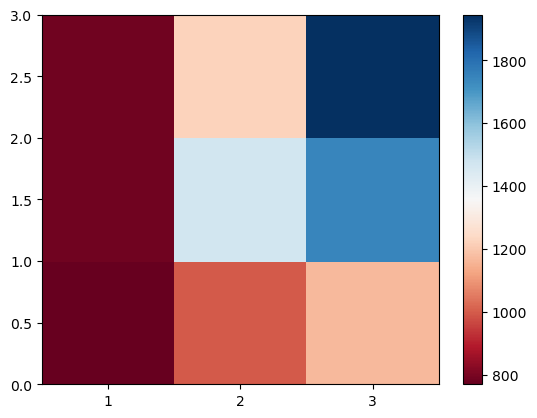

In [32]:
fig,ax=plt.subplots()
im=ax.pcolor(grouped_pivot,cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels tothe center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+ 0.5,minor=False)

ax.set_xticks(np.arange(grouped_pivot.shape[0])+0.5,minor=False)

#insert labels

ax.set_xticklabels(row_labels,minor=False)
ax.set_xticklabels(col_labels,minor=False)

fig.colorbar(im);

In [33]:
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,Cpu_core,Screen_Size_inch,Cpu_frequency,RAM_GB,Stroage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016


In [34]:
lm=LinearRegression()
X=df[['Cpu_frequency']]
y=df[['Price']]
lm.fit(X,y)
yhat=lm.predict(X)

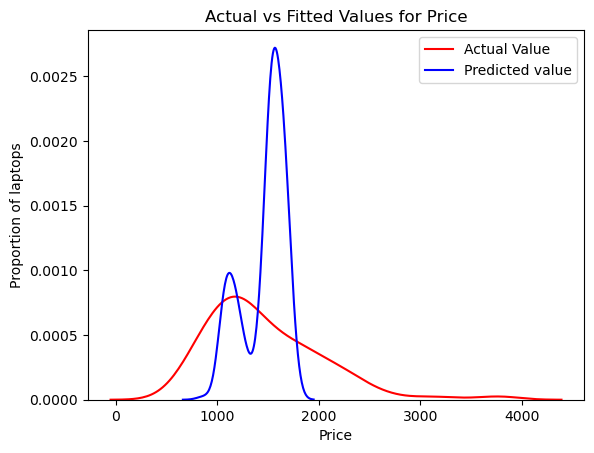

In [35]:
ax1 = sns.distplot(df["Price"],hist=False,color="r",label="Actual value")

#create a distribution plot for predicted value

sns.distplot(yhat, hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of laptops")
plt.legend(['Actual Value','Predicted value'])
plt.show()

In [36]:
mse = mean_squared_error(df['Price'],yhat)
r2_score_slr = lm.score(X,y)
print("The r-square for linear Regression is: ",r2_score_slr)
print()
print("The mean Squared erro of Price and predicted value is : ",mse)

The r-square for linear Regression is:  0.13194803012989764

The mean Squared erro of Price and predicted value is :  285745.348492732


Column names in the DataFrame:
Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'Cpu_core',
       'Screen_Size_inch', 'Cpu_frequency', 'RAM_GB', 'Stroage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')
Feature 'Storage_GB' is not in the DataFrame.
Feature 'CPU_cores' is not in the DataFrame.
R^2 score: 0.4945020339848183


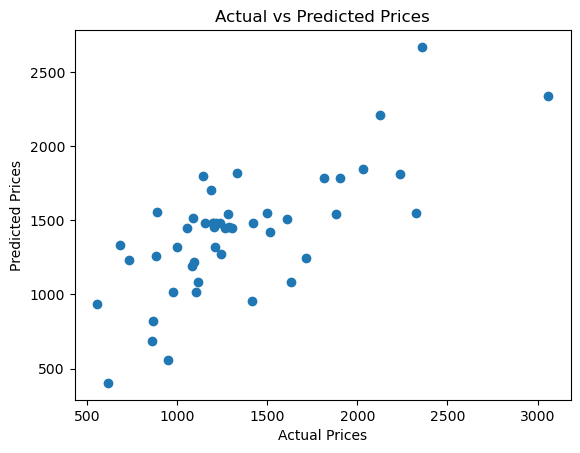

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your data

# Verify the column names
print("Column names in the DataFrame:")
print(df.columns)

# Define the features based on the actual column names in your DataFrame
features = ['Cpu_frequency', 'RAM_GB', 'Storage_GB', 'CPU_cores', 'OS', 'GPU', 'Category']

# Verify if the adjusted features exist in the DataFrame
for feature in features:
    if feature not in df.columns:
        print(f"Feature '{feature}' is not in the DataFrame.")

# Remove non-existing features from the list
features = [feature for feature in features if feature in df.columns]

# Select the features and target
X = df[features]
y = df['Price']  # Replace 'Price' with your actual target column name

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['OS', 'GPU', 'Category'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
lm1 = LinearRegression()

# Fit the model
lm1.fit(X_train, y_train)

# Make predictions
y_pred = lm1.predict(X_test)

# Print the R^2 score to evaluate the model
print(f"R^2 score: {lm1.score(X_test, y_test)}")

# Optional: Plot predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [42]:
df.info

<bound method DataFrame.info of     Manufacturer  Category     Screen  GPU  OS  Cpu_core  Screen_Size_inch  \
0           Dell         3    Full HD    1   1         3            39.624   
1           Dell         3    Full HD    1   1         7            39.624   
2           Dell         4  IPS Panel    2   1         5            33.782   
3             HP         4    Full HD    2   1         7            39.624   
4           Dell         3    Full HD    1   1         5            39.624   
..           ...       ...        ...  ...  ..       ...               ...   
232       Lenovo         4  IPS Panel    2   1         7            35.560   
233      Toshiba         3    Full HD    2   1         5            33.782   
234       Lenovo         4  IPS Panel    2   1         5            30.480   
235       Lenovo         3    Full HD    3   1         5            39.624   
236      Toshiba         3    Full HD    2   1         5            35.560   

     Cpu_frequency  RAM_GB  Str

## Polynomial Regression

In [46]:
import numpy as np
import pandas as pd

# Assuming X and y are initially Pandas Series or DataFrames
X = X.to_numpy().flatten() if hasattr(X, 'to_numpy') else X.flatten()
y = y.to_numpy().flatten() if hasattr(y, 'to_numpy') else y.flatten()

# Check lengths of X and y
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

# Ensure that X and y have the same length
if len(X) == len(y):
    f1 = np.polyfit(X, y, 1)
    p1 = np.poly1d(f1)
    
    f3 = np.polyfit(X, y, 3)
    p3 = np.poly1d(f3)
    
    f5 = np.polyfit(X, y, 5)
    p5 = np.poly1d(f5)
    
    print("Polynomial fits were successful.")
else:
    print("Error: X and y do not have the same length.")


Length of X: 1185
Length of y: 237
Error: X and y do not have the same length.


In [49]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

##pipeline

In [51]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define and prepare Z, for example, if Z is similar to X
# Replace this with your actual initialization of Z
# Assuming Z is a DataFrame or a Series
Z = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 3, 4, 5, 6]
})
y = pd.Series([1, 2, 3, 4, 5])

# Ensure Z is a numpy array and convert to float
Z = Z.to_numpy().astype(float)
y = y.to_numpy().astype(float)

# Define the pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)

# Fit the pipeline
pipe.fit(Z, y)

# Predict using the pipeline
ypipe = pipe.predict(Z)

print("Predictions:", ypipe)


Predictions: [1. 2. 3. 4. 5.]
